In [150]:
import pandas as pd
from datetime import datetime

def send_order(market='upbit',order_type='buy', quantity=1, target_date="2018-10-11", krw_balance = 0.0, btc_balance=0.0 ):
    
    bitcoin_dt = pd.read_csv('upbit_krwbtc_1day.csv')
    
    target_date = datetime.strptime(target_date,"%Y-%m-%d")
    
    price = -1
    
    for index, bitcoin in bitcoin_dt.iterrows():
        temp = datetime.strptime(bitcoin['timestamp'][:10],"%Y-%m-%d")
        if temp == target_date:
            price = float(bitcoin['close'])
            break;
            
            
    if order_type == 'buy':
        if (price*quantity) <= krw_balance:
            krw_balance = krw_balance - (price * quantity)
            btc_balance = btc_balance + quantity
            print("주문 성공 : 구매 -  btckrw:{} 수량:{} 원화잔고:{} 비트코인잔고:{}".
                  format(float(bitcoin['close']),quantity,krw_balance, btc_balance))
        else:
            print("주문실패 : 잔고부족")
            
    elif order_type == 'sell':
        if quantity <= btc_balance:
            krw_balance = krw_balance + (price * quantity)
            btc_balance = btc_balance - quantity
            print("주문 성공 : 판매 -  btckrw:{} 수량:{} 원화잔고:{} 비트코인잔고:{}".
                  format(float(bitcoin['close']),quantity,krw_balance, btc_balance))
        else:
            print("주문실패 : 잔고부족")
    
    return krw_balance, btc_balance

    

In [152]:
init_krw_bal = 100000000

krw_bal = init_krw_bal
btc_bal = 0

order_quantity = 8

list_len = 6
date_list=['2019-01-11','2019-02-11','2019-02-20','2019-06-11','2019-07-11','2019-07-20']
type_list=['buy','buy','buy','sell','sell','sell']

print("현재 원화잔고 : {}\\".format(krw_bal))
print("현재 비트코인잔고 : {}".format(btc_bal))

for i in range(list_len):
    krw_bal, btc_bal = send_order(market='upbit',
                                  order_type=type_list[i],
                                  quantity= order_quantity,
                                  target_date=date_list[i],
                                  krw_balance = krw_bal,
                                  btc_balance=btc_bal)
    
print("현재 원화잔고 : {}\\".format(krw_bal))
print("현재 비트코인잔고 : {}".format(btc_bal))
print("수익률 : {}%".format( (krw_bal-init_krw_bal)/init_krw_bal*100))

현재 원화잔고 : 100000000\
현재 비트코인잔고 : 0
주문 성공 : 구매 -  btckrw:4101000.0 수량:8 원화잔고:67192000.0 비트코인잔고:8
주문 성공 : 구매 -  btckrw:3986000.0 수량:8 원화잔고:35304000.0 비트코인잔고:16
주문 성공 : 구매 -  btckrw:4315000.0 수량:8 원화잔고:784000.0 비트코인잔고:24
주문 성공 : 판매 -  btckrw:9587000.0 수량:8 원화잔고:77480000.0 비트코인잔고:16
주문 성공 : 판매 -  btckrw:13770000.0 수량:8 원화잔고:187640000.0 비트코인잔고:8
주문 성공 : 판매 -  btckrw:12780000.0 수량:8 원화잔고:289880000.0 비트코인잔고:0
현재 원화잔고 : 289880000.0\
현재 비트코인잔고 : 0
수익률 : 189.88%


In [139]:
import ta

In [142]:
macd = ta.trend.MACD(bitcoin_dt['close'])

In [146]:
df = ta.add_all_ta_features(
    bitcoin_dt, open="open", high="high", low="low", close="close", volume="volume")

C:\Users\KOSCOM\Anaconda3\lib\site-packages\ta\trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
C:\Users\KOSCOM\Anaconda3\lib\site-packages\ta\trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


bitcoin_dt

In [162]:
bitcoin_dt = pd.read_csv('upbit_krwbtc_1day.csv')
df = bitcoin_dt

In [163]:
indicator_macd = ta.trend.MACD(df['close'])

In [164]:
# Add Bollinger Bands features
df['macd'] = indicator_macd.macd()
df['macd_diff'] = indicator_macd.macd_diff()
df['macd_signal'] = indicator_macd.macd_signal()

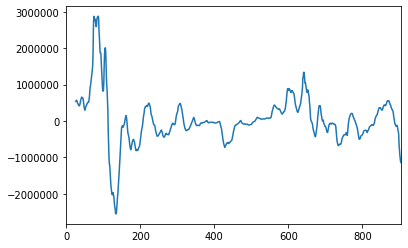

In [200]:
df['macd'].plot()

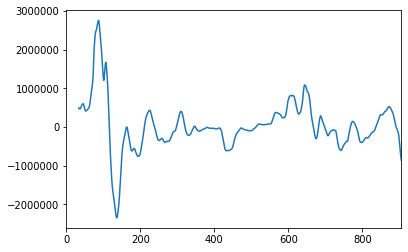

In [170]:
df['macd_signal'].plot()

In [171]:
df

,timestamp,open,close,high,low,volume,macd,macd_diff,macd_signal
0,2017-09-25T09:00:00,4201000.0,4322000.0,4333000.0,4175000.0,132.484755,NaN,NaN,NaN
1,2017-09-26T09:00:00,4317000.0,4321000.0,4418000.0,4311000.0,22.788340,NaN,NaN,NaN
2,2017-09-27T09:00:00,4322000.0,4657000.0,4677000.0,4318000.0,32.269662,NaN,NaN,NaN
3,2017-09-28T09:00:00,4657000.0,4586000.0,4772000.0,4519000.0,80.588243,NaN,NaN,NaN
4,2017-09-29T09:00:00,4586000.0,4657000.0,4709000.0,4476000.0,59.352373,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
901,2020-03-14T09:00:00,7261000.0,6823000.0,7284000.0,6600000.0,12799.582205,-9.087010e+05,-424991.479467,-483709.495249
902,2020-03-15T09:00:00,6823000.0,6909000.0,7298000.0,6660000.0,10779.970084,-9.996996e+05,-412792.047914,-586907.507227
903,2020-03-16T09:00:00,6905000.0,6385000.0,6914000.0,6000000.0,19383.807849,-1.101403e+06,-411596.171429,-689806.550084
904,2020-03-17T09:00:00,6385000.0,6774000.0,6885000.0,6280000.0,14938.329466,-1.137502e+06,-358156.161910,-779345.590562


In [193]:
date_list=[]
type_list=[]

for index, data in df.iterrows():
    if str(data['macd']) != 'nan':
        if df['macd'][index-1] * data['macd'] < 0:
            if data['macd']<0:
                print("sell : {},{}".format(data['macd'],data['timestamp']))
                date_list.append(data['timestamp'][:10])
                type_list.append("sell")
            else:
                print("buy : {},{}".format(data['macd'],data['timestamp']))
                date_list.append(data['timestamp'][:10])
                type_list.append("buy")


sell : -296984.1885231398,2018-01-16T09:00:00
buy : 607.17467732355,2018-03-02T09:00:00
sell : -91614.19833096862,2018-03-08T09:00:00
buy : 12853.143007135019,2018-04-20T09:00:00
sell : -26272.22668839805,2018-05-17T09:00:00
buy : 1924.1937058260664,2018-07-17T09:00:00
sell : -41630.25536519103,2018-08-08T09:00:00
buy : 16734.457010528073,2018-09-01T09:00:00
sell : -40445.322080205195,2018-09-08T09:00:00
buy : 6007.915969341062,2018-10-08T09:00:00
sell : -11460.715978840366,2018-10-11T09:00:00
buy : 7400.2726686205715,2019-01-08T09:00:00
sell : -9893.26186533086,2019-01-10T09:00:00
buy : 1879.582263130229,2019-02-17T09:00:00
sell : -14818.232243638486,2019-07-19T09:00:00
buy : 79177.05759454332,2019-08-05T09:00:00
sell : -27544.380923382938,2019-08-21T09:00:00
buy : 65414.972044635564,2019-10-29T09:00:00
sell : -33965.69213083759,2019-11-15T09:00:00
buy : 51265.44280757569,2020-01-07T09:00:00
sell : -30979.783454496413,2020-02-29T09:00:00


['2018-01-16',
 '2018-03-02',
 '2018-03-08',
 '2018-04-20',
 '2018-05-17',
 '2018-07-17',
 '2018-08-08',
 '2018-09-01',
 '2018-09-08',
 '2018-10-08',
 '2018-10-11',
 '2019-01-08',
 '2019-01-10',
 '2019-02-17',
 '2019-07-19',
 '2019-08-05',
 '2019-08-21',
 '2019-10-29',
 '2019-11-15',
 '2020-01-07',
 '2020-02-29']

In [199]:
init_krw_bal = 100000000

krw_bal = init_krw_bal
btc_bal = 0

order_quantity = 10


print("현재 원화잔고 : {}\\".format(krw_bal))
print("현재 비트코인잔고 : {}".format(btc_bal))

for i in range(len(date_list)):
    krw_bal, btc_bal = send_order(market='upbit',
                                  order_type=type_list[i],
                                  quantity= order_quantity,
                                  target_date=date_list[i],
                                  krw_balance = krw_bal,
                                  btc_balance=btc_bal)
    
print("현재 원화잔고 : {}\\".format(krw_bal))
print("현재 비트코인잔고 : {}".format(btc_bal))
print("수익률 : {}%".format( (krw_bal-init_krw_bal)/init_krw_bal*100))

현재 원화잔고 : 100000000\
현재 비트코인잔고 : 0
주문실패 : 잔고부족
주문실패 : 잔고부족
주문실패 : 잔고부족
주문 성공 : 구매 -  btckrw:9552000.0 수량:10 원화잔고:4480000.0 비트코인잔고:10
주문 성공 : 판매 -  btckrw:9090000.0 수량:10 원화잔고:95380000.0 비트코인잔고:0
주문 성공 : 구매 -  btckrw:8080000.0 수량:10 원화잔고:14580000.0 비트코인잔고:10
주문 성공 : 판매 -  btckrw:7308000.0 수량:10 원화잔고:87660000.0 비트코인잔고:0
주문 성공 : 구매 -  btckrw:8001000.0 수량:10 원화잔고:7650000.0 비트코인잔고:10
주문 성공 : 판매 -  btckrw:7206000.0 수량:10 원화잔고:79710000.0 비트코인잔고:0
주문 성공 : 구매 -  btckrw:7542000.0 수량:10 원화잔고:4290000.0 비트코인잔고:10
주문 성공 : 판매 -  btckrw:7187000.0 수량:10 원화잔고:76160000.0 비트코인잔고:0
주문 성공 : 구매 -  btckrw:4480000.0 수량:10 원화잔고:31360000.0 비트코인잔고:10
주문 성공 : 판매 -  btckrw:4087000.0 수량:10 원화잔고:72230000.0 비트코인잔고:0
주문 성공 : 구매 -  btckrw:4040000.0 수량:10 원화잔고:31830000.0 비트코인잔고:10
주문 성공 : 판매 -  btckrw:12549000.0 수량:10 원화잔고:157320000.0 비트코인잔고:0
주문 성공 : 구매 -  btckrw:14181000.0 수량:10 원화잔고:15510000.0 비트코인잔고:10
주문 성공 : 판매 -  btckrw:12293000.0 수량:10 원화잔고:138440000.0 비트코인잔고:0
주문 성공 : 구매 -  btckrw:10894000.0 수량:10 원화잔고:29500000.